# Proyecto Integrador de Aprendizaje
## Utilizando los conjuntos de datos, encuentra un modelo de clasificacion con sus parametros utilizando cross validation con el criterio  
## ROC_auc que te de un valor mayor de 0.75 en el conjunto de validacion y prueba. 
## Incluye un reporte donde expongas los resultados y el codigo en el repositorio de git.

### Descripción del Conjunto de Datos

Este conjunto de datos contiene información sobre películas y varias métricas relacionadas con su contenido y características. La variable `engagement` indica si una persona vio la película.

### Variables

1. **id**:
   - Tipo de dato: Entero.

2. **title_word_count**:
   - Tipo de dato: Entero.

3. **document_entropy**:
   - Tipo de dato: Flotante.

4. **freshness**:
   - Tipo de dato: Entero.

5. **easiness**:
   - Tipo de dato: Flotante.

6. **fraction_stopword_presence**:
   - Tipo de dato: Flotante.

7. **normalization_rate**:
   - Tipo de dato: Flotante.

8. **speaker_speed**:
   - Tipo de dato: Flotante.

9. **silent_period_rate**:
   - Tipo de dato: Flotante.

10. **engagement**:
    - Tipo de dato: Booleano 



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
train_data = pd.read_csv("train.csv")
train_data.head()

,id,title_word_count,document_entropy,freshness,easiness,fraction_stopword_presence,normalization_rate,speaker_speed,silent_period_rate,engagement
0,1,9,7.753995,16310,75.583936,0.553664,0.034049,2.997753,0.0,True
1,2,6,8.305269,15410,86.870523,0.584498,0.018763,2.635789,0.0,False
2,3,3,7.965583,15680,81.915968,0.605685,0.030720,2.538095,0.0,False
3,4,9,8.142877,15610,80.148937,0.593664,0.016873,2.259055,0.0,False
4,5,9,8.161250,14920,76.907549,0.581637,0.023412,2.420000,0.0,False


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9239 entries, 0 to 9238
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          9239 non-null   int64  
 1   title_word_count            9239 non-null   int64  
 2   document_entropy            9239 non-null   float64
 3   freshness                   9239 non-null   int64  
 4   easiness                    9239 non-null   float64
 5   fraction_stopword_presence  9239 non-null   float64
 6   normalization_rate          9239 non-null   float64
 7   speaker_speed               9239 non-null   float64
 8   silent_period_rate          9239 non-null   float64
 9   engagement                  9239 non-null   bool   
dtypes: bool(1), float64(6), int64(3)
memory usage: 658.8 KB


### Comprobamos que el conjuntos de datos no tengan datos vacios.

In [4]:
# Contar el numero de datos nulos
train_data[train_data.isna().any(axis='columns')].count()

id                            0
title_word_count              0
document_entropy              0
freshness                     0
easiness                      0
fraction_stopword_presence    0
normalization_rate            0
speaker_speed                 0
silent_period_rate            0
engagement                    0
dtype: int64

In [5]:
train_data.describe()

,id,title_word_count,document_entropy,freshness,easiness,fraction_stopword_presence,normalization_rate,speaker_speed,silent_period_rate
count,9239.000000,9239.000000,9239.000000,9239.000000,9239.000000,9239.000000,9239.000000,9239.000000,9239.000000
mean,4620.000000,7.701050,7.792685,14808.587509,84.756029,0.612214,0.021354,2.413320,0.146606
std,2667.213902,3.785066,0.697710,1208.953646,8.303489,0.051872,0.009545,1.588296,0.172030
min,1.000000,1.000000,0.000000,10830.000000,28.210966,0.000000,0.000000,0.000302,0.000000
25%,2310.500000,5.000000,7.594235,14070.000000,80.415060,0.589632,0.014974,1.976727,0.000000
50%,4620.000000,7.000000,7.875103,14750.000000,84.482122,0.613127,0.019843,2.267133,0.104915
75%,6929.500000,10.000000,8.164166,15600.000000,88.388711,0.634585,0.026288,2.539207,0.250927
max,9239.000000,33.000000,9.278573,17430.000000,122.032000,1.000000,0.101990,50.850000,1.168239


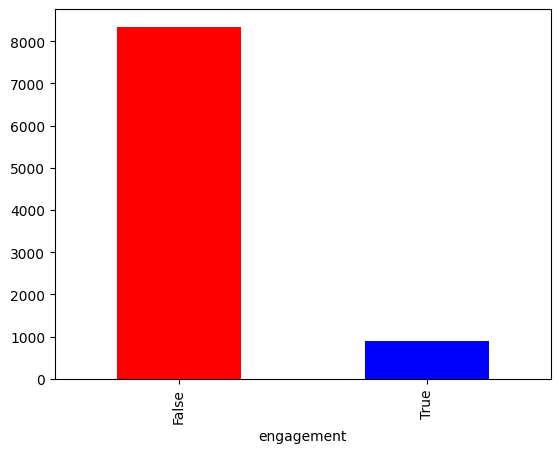

In [6]:
# visulizar la distribucion de los datos booleanos de la variable engagement
train_data["engagement"].value_counts().plot(kind="bar",
                                           color=['red', 'blue']);


In [7]:
train_data["engagement"].value_counts()

engagement
False    8342
True      897
Name: count, dtype: int64

### De los datos podemos aprender que la mayoria de las personas no han visto las peliculas.

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
import joblib


In [9]:
# Asignar características y etiquetas
X = train_data.drop(columns=['engagement'])
y = train_data['engagement']

In [10]:
# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
X_train

array([[ 0.12135517, -0.71506764,  0.89231581, ..., -0.82144258,
        -0.21607589,  0.98189391],
       [-1.18125315, -0.18642899, -0.42136957, ..., -1.06533369,
         0.39699606, -0.849056  ],
       [ 0.33789364, -0.45074832, -0.13432288, ...,  1.24195122,
        -0.14395427,  0.42666111],
       ...,
       [ 0.29098322, -1.77234495, -0.04686395, ..., -1.11863044,
        -0.30552372,  0.84931092],
       [-1.40905011,  0.07789034,  0.26246359, ...,  0.34777309,
         0.14099098, -0.849056  ],
       [ 0.99651582, -0.45074832, -0.17760988, ..., -0.05439541,
         0.50648945, -0.849056  ]])

In [13]:
# Convertir los datos a tensores
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [14]:
X_train

tensor([[ 0.1214, -0.7151,  0.8923,  ..., -0.8214, -0.2161,  0.9819],
        [-1.1813, -0.1864, -0.4214,  ..., -1.0653,  0.3970, -0.8491],
        [ 0.3379, -0.4507, -0.1343,  ...,  1.2420, -0.1440,  0.4267],
        ...,
        [ 0.2910, -1.7723, -0.0469,  ..., -1.1186, -0.3055,  0.8493],
        [-1.4091,  0.0779,  0.2625,  ...,  0.3478,  0.1410, -0.8491],
        [ 0.9965, -0.4507, -0.1776,  ..., -0.0544,  0.5065, -0.8491]])

In [14]:
# Definir el modelo
class NeuralNet(nn.Module):
    def __init__(self, input_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 50)
        self.fc2 = nn.Linear(50, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x


In [15]:
# Inicializar el modelo
input_size = X_train.shape[1]
num_epochs = 100
batch_size = 64
learning_rate = 0.001

In [16]:
def train_model(model, criterion, optimizer, X_train, y_train):
    train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

    for epoch in range(num_epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch).squeeze()
            loss = criterion(outputs, y_batch.squeeze())
            loss.backward()
            optimizer.step()

In [17]:
# Cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_roc_auc_scores = []

In [18]:
for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    model = NeuralNet(input_size)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_model(model, criterion, optimizer, X_train_fold, y_train_fold)

    model.eval()
    with torch.no_grad():
        y_val_pred = model(X_val_fold).squeeze()
        auc = roc_auc_score(y_val_fold, y_val_pred)
        cv_roc_auc_scores.append(auc)


In [19]:

mean_cv_roc_auc = np.mean(cv_roc_auc_scores)
print(f"Cross-Validation AUC Scores: {cv_roc_auc_scores}")
print(f"Mean Cross-Validation AUC: {mean_cv_roc_auc}")

Cross-Validation AUC Scores: [0.8765398051112336, 0.883391953597433, 0.8736219095808136, 0.9060224608169815, 0.8582774958217697]
Mean Cross-Validation AUC: 0.8795707249856463


In [20]:
# Evaluar el modelo en el conjunto de prueba
model.eval()
with torch.no_grad():
    y_test_pred = model(X_test).squeeze()
    test_roc_auc = roc_auc_score(y_test, y_test_pred)
    y_test_pred_class = (y_test_pred >= 0.5).float()
    test_accuracy = (y_test_pred_class == y_test.squeeze()).float().mean()
    classification_rep = classification_report(y_test, y_test_pred_class)
    conf_matrix = confusion_matrix(y_test, y_test_pred_class)

In [21]:
print(f"Test ROC AUC Score: {test_roc_auc}")
print(f"Test Accuracy: {test_accuracy}")
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

Test ROC AUC Score: 0.8983345036820974
Test Accuracy: 0.9383116960525513
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97      1683
         1.0       0.72      0.50      0.59       165

    accuracy                           0.94      1848
   macro avg       0.84      0.74      0.78      1848
weighted avg       0.93      0.94      0.93      1848

Confusion Matrix:
[[1651   32]
 [  82   83]]


In [24]:
# Guardar los parámetros del modelo
torch.save(model.state_dict(), 'modelo_parametros.pth')

In [25]:

# Guardar el modelo completo 
torch.save(model, 'modelo_completo.pth')